In [1]:
import pandas as pd
import numpy as np

In [2]:
ids = pd.read_csv("../11_train_data/10_01_select_train_data.tsv", sep="\t", header=None)
print(ids.shape)
ids.head()

(626, 1)


,0
0,CALB0000
1,CALB0001
2,CALB0002
3,CALB0003
4,CALB0004


In [3]:
dmeta = pd.read_csv("../../../17_phenotypes/06_combine_tables.tsv", sep='\t', header=0)
dmeta.head()
#dmeta['Posaconazole'].hist(bins=40)
#dmeta[dmeta['Posaconazole']>0].sort_values(by='Posaconazole')[['Posaconazole']].value_counts()

,SampleID,Study,5-Fluorocytosine,Amphotericin B,Anidulafungin,Caspofungin,Fluconazole,Itraconazole,Micafungin,Posaconazole,Voriconazole,F_MISS,O(HET),MEAN_DEPTH,rd,ref_10,K20
0,1015031ECS,WGS300,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.004743,0.072399,110.794,148.075,0.997368,0.0
1,111H952ECSsmall,WGS300,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.023215,0.030956,134.142,192.730,0.990057,14.0
2,1124960HVS,WGS300,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.003998,0.075521,118.884,160.287,0.997957,0.0
3,1144959ECS,WGS300,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.024501,0.031187,111.953,153.307,0.989730,14.0
4,1154947HVS,WGS300,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.005456,0.059057,133.147,181.811,0.997183,0.0


In [18]:
drug = 'Fluconazole'
dmeta.loc[dmeta[drug]!=-1, drug].min()

0.019

In [27]:
np.log2(dmeta.loc[dmeta[drug]!=-1, drug].min())

-5.717856771218502

<Axes: >

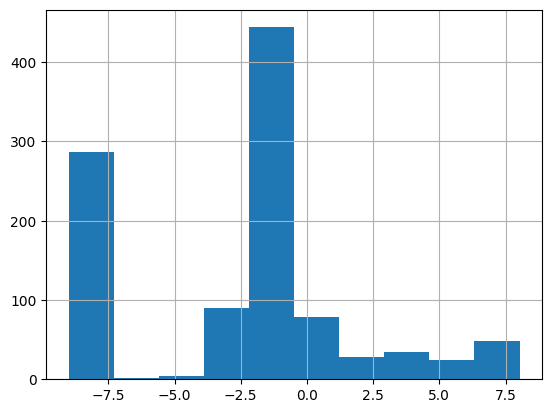

In [26]:
dmeta['Log'] = dmeta.apply(lambda x: -9 if x[drug] == -1 else np.log2(x[drug]), axis=1)
dmeta['Log'].hist()

In [20]:
phens = dmeta[['SampleID','Log']].reset_index(drop=True)
phens

,SampleID,Log
0,1015031ECS,-9.0
1,111H952ECSsmall,-9.0
2,1124960HVS,-9.0
3,1144959ECS,-9.0
4,1154947HVS,-9.0
...,...,...
1035,MYC-19-11,-9.0
1036,MYC-19-2,1.0
1037,MYC-19-28,-2.0
1038,MYC-19-9,-9.0


In [21]:
phens['Log'].value_counts().sort_values()

Log
 8.027906      1
 8.016808      1
 8.011227      1
 8.005625      1
-4.411195      1
-5.717857      1
 1.584963      1
-5.442222      1
 0.925999      1
 8.022368      1
 4.584963      2
 0.584963      2
-3.965784      2
 6.584963      5
-0.415037      6
-3.411195      7
 6.000000     10
 7.000000     11
 1.000000     14
 5.000000     14
-3.000000     16
 3.000000     16
 4.000000     17
-1.395929     23
 2.000000     27
 8.000000     27
-2.395929     29
-3.058894     38
 0.000000     56
-1.000000    194
-2.000000    227
-9.000000    287
Name: count, dtype: int64

In [22]:
dm = pd.merge(ids, phens, left_on = 0, right_on = "SampleID", how = 'left')
print(dm.shape)
dm['Log'].value_counts()
#dm = dm.drop(columns=['SampleID'])
#dm.head()

(626, 3)


Log
-2.000000    196
-1.000000    163
 0.000000     50
-2.395929     29
 2.000000     27
-1.395929     23
 8.000000     21
-3.058894     20
-3.000000     16
 1.000000     13
 5.000000     10
 4.000000      8
-3.411195      7
-9.000000      6
 6.000000      5
 6.584963      5
-0.415037      5
 7.000000      4
-3.965784      2
 0.584963      2
 4.584963      2
 3.000000      2
 0.925999      1
 1.584963      1
-5.442222      1
-5.717857      1
-4.411195      1
 8.005625      1
 8.011227      1
 8.016808      1
 8.022368      1
 8.027906      1
Name: count, dtype: int64

In [23]:
dm.to_csv("22_00_phenotypes.txt", sep="\t", header=False, index=False)

In [51]:
#print(dm.shape)
#dm['Posaconazole_bin'].value_counts()